In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
file_path = "Data Analyst Intern Assignment - Excel.xlsx"
user_details = pd.read_excel(file_path, sheet_name="UserDetails.csv")
cooking_sessions = pd.read_excel(file_path, sheet_name="CookingSessions.csv")
order_details = pd.read_excel(file_path, sheet_name="OrderDetails.csv")


print("UserDetails - Head:")
print(user_details)

print("\nCookingSessions - Head:")
print(cooking_sessions)

print("\nOrderDetails - Head:")
print(order_details)

UserDetails - Head:
  User ID      User Name  Age       Location Registration Date         Phone  \
0    U001  Alice Johnson   28       New York        2023-01-15  123-456-7890   
1    U002      Bob Smith   35    Los Angeles        2023-02-20  987-654-3210   
2    U003    Charlie Lee   42        Chicago        2023-03-10  555-123-4567   
3    U004    David Brown   27  San Francisco        2023-04-05  444-333-2222   
4    U005     Emma White   30        Seattle        2023-05-22  777-888-9999   
5    U006    Frank Green   25         Austin        2023-06-15  888-777-6666   
6    U007     Grace King   38         Boston        2023-07-02  999-888-7777   
7    U008      Henry Lee   31          Miami        2023-08-11  101-202-3030   
8    U009    Irene Moore   33         Dallas        2023-09-01  202-303-4040   
9    U010     Jack White   29        Phoenix        2023-10-10  303-404-5050   

               Email Favorite Meal  Total Orders  
0    alice@email.com        Dinner            12

In [2]:
# Check for missing values
print("\nMissing Values in UserDetails:")
print(user_details.isnull().sum())

print("\nMissing Values in CookingSessions:")
print(cooking_sessions.isnull().sum())

print("\nMissing Values in OrderDetails:")
print(order_details.isnull().sum())


Missing Values in UserDetails:
User ID              0
User Name            0
Age                  0
Location             0
Registration Date    0
Phone                0
Email                0
Favorite Meal        0
Total Orders         0
dtype: int64

Missing Values in CookingSessions:
Session ID         0
User ID            0
Dish Name          0
Meal Type          0
Session Start      0
Session End        0
Duration (mins)    0
Session Rating     0
dtype: int64

Missing Values in OrderDetails:
Order ID        0
User ID         0
Order Date      0
Meal Type       0
Dish Name       0
Order Status    0
Amount (USD)    0
Time of Day     0
Rating          2
Session ID      0
dtype: int64


In [3]:
# Clean UserDetails
user_details.drop_duplicates(inplace=True)
user_details['Registration Date'] = pd.to_datetime(user_details['Registration Date'])

# Clean CookingSessions
cooking_sessions.drop_duplicates(inplace=True)
cooking_sessions['Session Start'] = pd.to_datetime(cooking_sessions['Session Start'])
cooking_sessions['Session End'] = pd.to_datetime(cooking_sessions['Session End'])

# Clean OrderDetails
order_details.drop_duplicates(inplace=True)
order_details['Order Date'] = pd.to_datetime(order_details['Order Date'])
order_details['Rating'] = order_details['Rating'].fillna(order_details['Rating'].mean())
order_details['Order Status'] = order_details['Order Status'].str.strip()


print("UserDetails - Head:")
print(user_details)

print("\nCookingSessions - Head:")
print(cooking_sessions)

print("\nOrderDetails - Head:")
print(order_details)

UserDetails - Head:
  User ID      User Name  Age       Location Registration Date         Phone  \
0    U001  Alice Johnson   28       New York        2023-01-15  123-456-7890   
1    U002      Bob Smith   35    Los Angeles        2023-02-20  987-654-3210   
2    U003    Charlie Lee   42        Chicago        2023-03-10  555-123-4567   
3    U004    David Brown   27  San Francisco        2023-04-05  444-333-2222   
4    U005     Emma White   30        Seattle        2023-05-22  777-888-9999   
5    U006    Frank Green   25         Austin        2023-06-15  888-777-6666   
6    U007     Grace King   38         Boston        2023-07-02  999-888-7777   
7    U008      Henry Lee   31          Miami        2023-08-11  101-202-3030   
8    U009    Irene Moore   33         Dallas        2023-09-01  202-303-4040   
9    U010     Jack White   29        Phoenix        2023-10-10  303-404-5050   

               Email Favorite Meal  Total Orders  
0    alice@email.com        Dinner            12

In [4]:
# Check for missing values
print("\nMissing Values in UserDetails:")
print(user_details.isnull().sum())

print("\nMissing Values in CookingSessions:")
print(cooking_sessions.isnull().sum())

print("\nMissing Values in OrderDetails:")
print(order_details.isnull().sum())


Missing Values in UserDetails:
User ID              0
User Name            0
Age                  0
Location             0
Registration Date    0
Phone                0
Email                0
Favorite Meal        0
Total Orders         0
dtype: int64

Missing Values in CookingSessions:
Session ID         0
User ID            0
Dish Name          0
Meal Type          0
Session Start      0
Session End        0
Duration (mins)    0
Session Rating     0
dtype: int64

Missing Values in OrderDetails:
Order ID        0
User ID         0
Order Date      0
Meal Type       0
Dish Name       0
Order Status    0
Amount (USD)    0
Time of Day     0
Rating          0
Session ID      0
dtype: int64


In [5]:
# Merge UserDetails with CookingSessions
merged_data = pd.merge(user_details, cooking_sessions, on="User ID", how="outer")

# Merge the result with OrderDetails
final_data = pd.merge(merged_data, order_details, on=["User ID", "Session ID"], how="outer")

print("\nMerged Data - Head:")
print(final_data)


Merged Data - Head:
   User ID      User Name  Age       Location Registration Date         Phone  \
0     U001  Alice Johnson   28       New York        2023-01-15  123-456-7890   
1     U001  Alice Johnson   28       New York        2023-01-15  123-456-7890   
2     U001  Alice Johnson   28       New York        2023-01-15  123-456-7890   
3     U002      Bob Smith   35    Los Angeles        2023-02-20  987-654-3210   
4     U002      Bob Smith   35    Los Angeles        2023-02-20  987-654-3210   
5     U002      Bob Smith   35    Los Angeles        2023-02-20  987-654-3210   
6     U003    Charlie Lee   42        Chicago        2023-03-10  555-123-4567   
7     U003    Charlie Lee   42        Chicago        2023-03-10  555-123-4567   
8     U003    Charlie Lee   42        Chicago        2023-03-10  555-123-4567   
9     U004    David Brown   27  San Francisco        2023-04-05  444-333-2222   
10    U004    David Brown   27  San Francisco        2023-04-05  444-333-2222   
11    U

In [6]:
final_data['Meal Type'] = final_data['Meal Type_y']
final_data['Dish Name'] = final_data['Dish Name_y']

In [7]:
# Correlation between total orders and session ratings
correlation = final_data.groupby('User ID')[['Total Orders', 'Session Rating']].mean().corr()
print("Correlation between Total Orders and Session Rating:")
print(correlation)

Correlation between Total Orders and Session Rating:
                Total Orders  Session Rating
Total Orders        1.000000        0.511785
Session Rating      0.511785        1.000000


Top 10 Popular Dishes:
Dish Name
Spaghetti          4
Grilled Chicken    4
Caesar Salad       3
Pancakes           2
Veggie Burger      2
Oatmeal            1
Name: count, dtype: int64


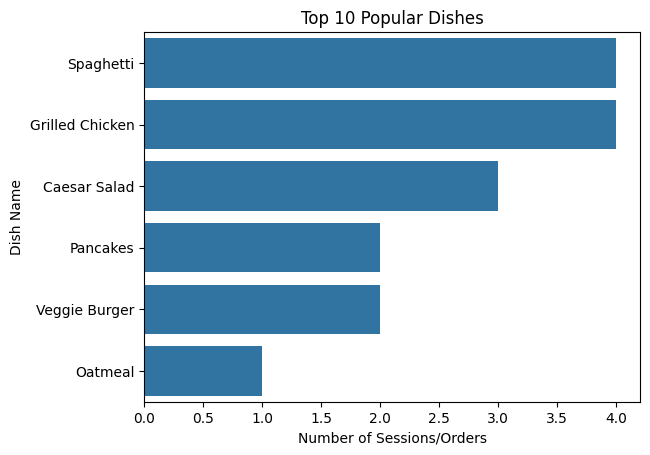

In [8]:
# Popular dishes by frequency
popular_dishes = final_data['Dish Name'].value_counts().head(10)
print("Top 10 Popular Dishes:")
print(popular_dishes)

# Plot popular dishes
sns.barplot(x=popular_dishes.values, y=popular_dishes.index)
plt.title("Top 10 Popular Dishes")
plt.xlabel("Number of Sessions/Orders")
plt.ylabel("Dish Name")
plt.show()

<ipython-input-9-2053ce71022a>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_analysis = final_data.groupby(age_groups)['Total Orders'].mean()


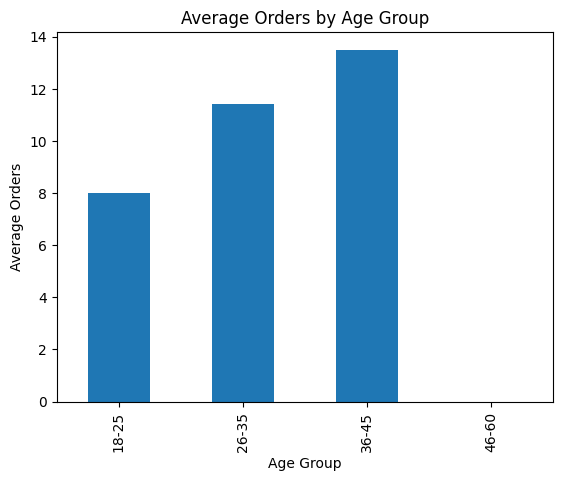

In [9]:
# Analyze age groups
age_groups = pd.cut(user_details['Age'], bins=[18, 25, 35, 45, 60], labels=["18-25", "26-35", "36-45", "46-60"])
age_group_analysis = final_data.groupby(age_groups)['Total Orders'].mean()

# Plot age group analysis
age_group_analysis.plot(kind='bar', title='Average Orders by Age Group')
plt.xlabel("Age Group")
plt.ylabel("Average Orders")
plt.show()

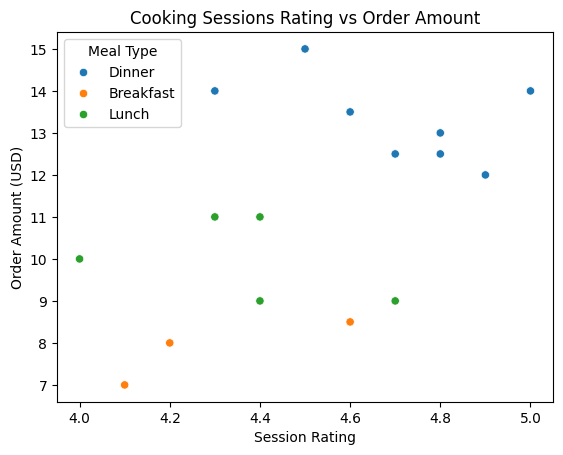

In [10]:
# Cooking sessions vs orders by user
sns.scatterplot(data=final_data, x="Session Rating", y="Amount (USD)", hue="Meal Type")
plt.title("Cooking Sessions Rating vs Order Amount")
plt.xlabel("Session Rating")
plt.ylabel("Order Amount (USD)")
plt.show()

In [11]:
# Save cleaned and merged dataset
final_data.to_csv("final_data.csv", index=False)

# Save insights to a summary file
with open("summary.txt", "w") as file:
    file.write("Correlation between Total Orders and Session Ratings:\n")
    file.write(str(correlation) + "\n\n")
    file.write("Top 10 Popular Dishes:\n")
    file.write(str(popular_dishes) + "\n")
    file.write("Average Orders by Age Group:\n")
    file.write(str(age_group_analysis) + "\n")